# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams.update({'font.size': 14})
plt.style.use('ggplot')

## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

## Extracting Quantities Using Experimental Data

### Finding the error on the radii and their means

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  


In [3]:
# putting all the data into one array
radius_all = np.array([radius_data1, radius_data2, radius_data3])

V = 7.6 * 10 ** 3 # volume of the drop meausred in micrometres^-3

# means of the radii at each time step and their standard deviations
radius_means = np.mean(radius_all, axis=0)
radius_std = np.std(radius_all, axis=0)

In the above cell, the error in the radius was found by calculating the standard deviation between the 3 values. All the values calculated later uses the same method to find their uncertainties. Further in the notebook the same analysis is carried out but using error propagation to find the uncertainties instead. 

### Finding the speeds and their errors

In [4]:
# calculating the speed by differentiating
delta_t = 0.5

radius_diff1 = np.diff(radius_data1)
radius_diff2 = np.diff(radius_data2)
radius_diff3 = np.diff(radius_data3)

speeds1 = abs(radius_diff1 / delta_t)
speeds2 = abs(radius_diff2 / delta_t)
speeds3 = abs(radius_diff3 / delta_t)
speeds_all = np.array([speeds1, speeds2, speeds3])

speeds_mean = np.mean(speeds_all, axis=0)
speeds_std = np.std(speeds_all, axis=0, ddof=1)

The above method using np.diff finds the difference in the values by doing array[i + 1] - array[i]. This will mean there is always 1 less value in the returned array.

In [5]:
# the speed arrays will have a length 1 less than the radius arrays, so here we remove the first element 
# in the time and radius arrays in order to match the speed array to make further calculations consistent.
time_new = np.delete(time, 0)
radius_data1_new = np.delete(radius_data1, 0)
radius_data2_new = np.delete(radius_data2, 0)
radius_data3_new = np.delete(radius_data3, 0)

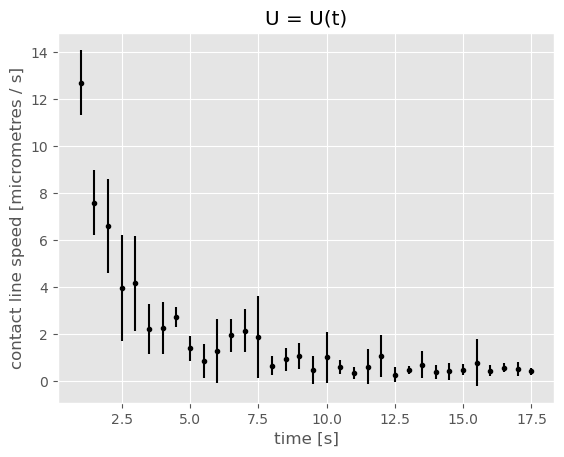

In [6]:
# plotting the speeds against time
plt.errorbar(time_new, speeds_mean, yerr=speeds_std, fmt="k.")
plt.xlabel("time [s]")
plt.ylabel("contact line speed [micrometres / s]")
plt.title("U = U(t)")
plt.show()

As expected from experiment, the contact line speed falls off quickly then hovers around 0. These values, for the scale of the experiment, look appropriate as they are on the scale of just a few micrometres per second.

Next, in order to find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

### Finding the height of the drops and their errors

In [7]:
# using Cardano's formula to get an exact solution for the drop height
def cardano(radius):
    p = 3 * radius ** 2
    q = (-6 * V) / np.pi
    
    u_1 = -q / 2 + np.sqrt((q ** 2) / 4 + (p ** 3) / 27)
    u_2 = -q / 2 - np.sqrt((q ** 2) / 4 + ((p ** 3) / 27))
    roots = np.cbrt(u_1) + np.cbrt(u_2)
    return roots


heights1 = cardano(radius_data1_new)
heights2 = cardano(radius_data2_new)
heights3 = cardano(radius_data3_new)
heights_all = np.array([heights1, heights2, heights3])

heights_means = np.mean(heights_all, axis=0)
heights_std = np.std(heights_means)

### Finding the contact angles and their errors

In [8]:
# calculating the contact angles (in radians)
def calc_contact_angles(radius, heights):
    return np.pi / 2 - np.arctan((radius ** 2 - heights ** 2) / (2 * heights * radius))


contact_angles1 = calc_contact_angles(radius_data1_new, heights1)
contact_angles2 = calc_contact_angles(radius_data2_new, heights2)
contact_angles3 = calc_contact_angles(radius_data3_new, heights3)
contact_angles_all = np.array([contact_angles1, contact_angles2, contact_angles3])

contact_angle_means = np.mean(contact_angles_all, axis=0)
contact_angles_std = np.std(contact_angles_all, axis=0, ddof=1)

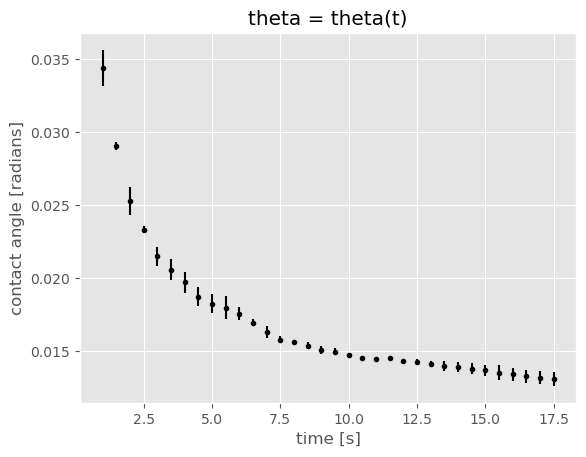

In [9]:
# checking the contact angles data against time
plt.errorbar(time_new, contact_angle_means, yerr=contact_angles_std, fmt="k.")
plt.xlabel("time [s]")
plt.ylabel("contact angle [radians]")
plt.title("theta = theta(t)")
plt.show()

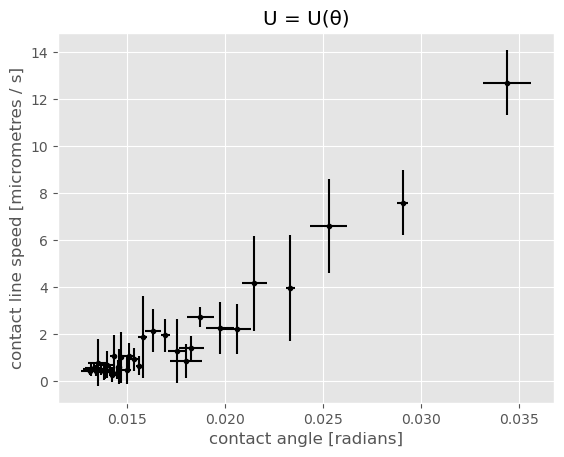

In [10]:
plt.errorbar(contact_angle_means, speeds_mean, yerr=speeds_std, xerr=contact_angles_std, fmt="k.")
plt.xlabel("contact angle [radians]")
plt.ylabel("contact line speed [micrometres / s]")
plt.title("U = U(θ)")
plt.show()

## Fitting Spreading Laws

Here scipy's curve_fit function was used to fit the spreading laws. This function works by defining the models passing those models into the function along with the measured data and an inital guess for the parameters. The function returns optimal parameters and their covariance matrix. The covariance matrix has the errors on the parameters given along the diagonal of the matrix.

In [11]:
# finding the best fit model using scipy's curve_fit()
from scipy.optimize import curve_fit

# defining the models to fit onto the data
def cox_voinov(theta, u_0, theta_0):
    return u_0 * (theta ** 3 - theta_0 ** 3)


def de_gennes(theta, u_0, theta_0):
    return u_0 * (theta ** 2 - theta_0 ** 2)

# using curve_fit() to find the parameters and their uncertainties.
popt_cv, pcov_cv = curve_fit(cox_voinov, contact_angle_means, speeds_mean, sigma=speeds_std, p0=[0.8, 0.005])
u_0_cv, theta_0_cv = popt_cv

popt_dg, pcov_dg = curve_fit(de_gennes, contact_angle_means, speeds_mean, sigma=speeds_std, p0=[0.8, 0.005])
u_0_dg, theta_0_dg = popt_dg

# checking the parameters
print("---- Best-fit Parameters ----")
print(f"Cox-Voinov: u_0 = ({u_0_cv} \u00B1 {sqrt(pcov_cv[0][0])}) ms^-1, (theta_0 = {theta_0_cv} \u00B1 {sqrt(pcov_cv[1][1])}) rads")
print(f"de Gennes: u_0 =({u_0_dg} \u00B1 {sqrt(pcov_dg[0][0])}) ms^-1, (theta_0 = {theta_0_dg} \u00B1 {sqrt(pcov_dg[1][1])}) rads")

---- Best-fit Parameters ----
Cox-Voinov: u_0 = (336209.5399310094 ± 19100.03472710954) ms^-1, (theta_0 = 0.01051079427756791 ± 0.0005027144054226795) rads
de Gennes: u_0 =(10862.883491548762 ± 680.0867255510921) ms^-1, (theta_0 = 0.012123766235908702 ± 0.00023299728767296122) rads


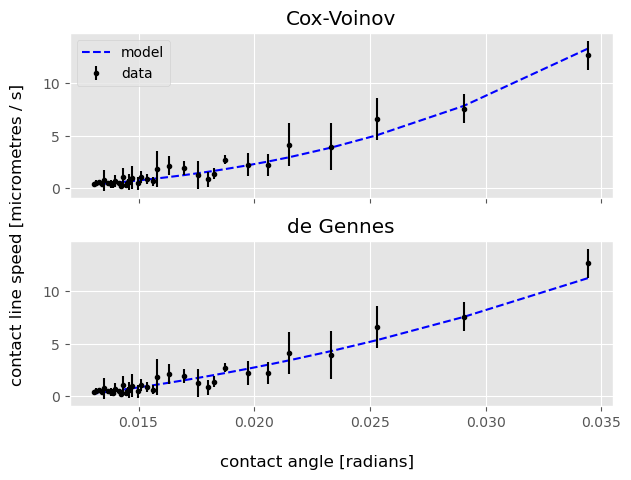

In [12]:
# computing model's predictions 
cox_voinov_speeds = cox_voinov(contact_angle_means, u_0_cv, theta_0_cv)
de_gennes_speeds = de_gennes(contact_angle_means, u_0_dg, theta_0_dg)

# plotting the models against the data
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(contact_angle_means, cox_voinov_speeds, "b--", label="model")
ax1.errorbar(contact_angle_means, speeds_mean, yerr=speeds_std, fmt="k.", label="data")
ax1.set_title("Cox-Voinov")
ax1.legend()

ax2.plot(contact_angle_means, de_gennes_speeds, "b--")
ax2.errorbar(contact_angle_means, speeds_mean, yerr=speeds_std, fmt="k.")
ax2.set_title("de Gennes")

fig.supxlabel("contact angle [radians]")
fig.supylabel("contact line speed [micrometres / s]")

plt.tight_layout()
plt.show()

## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

In [13]:
# creating a function to calculate the chi squared
def calc_chi_squared(model, data, error):
    chi_squared = np.sum((model - data) ** 2 / error ** 2)
    return chi_squared


# chi squared values
chi_squared_cv = calc_chi_squared(cox_voinov_speeds, speeds_mean, speeds_std)
chi_squared_dg = calc_chi_squared(de_gennes_speeds, speeds_mean, speeds_std)

# reduced chi squared values
degrees_of_freedom = len(speeds_mean) - 2
reduced_chi_squared_cv = chi_squared_cv / degrees_of_freedom
reduced_chi_squared_dg = chi_squared_dg / degrees_of_freedom

print(f"The chi squared value of Cox-Voinox is {chi_squared_cv:.3f} and for de Gennes it is {chi_squared_dg:.3f} .")
print(f"The reduced chi squared value of the Cox-Voinox is {reduced_chi_squared_cv:.3f} and for de Gennes it is {reduced_chi_squared_dg:.3f} for {degrees_of_freedom} degrees of freedom.")

The chi squared value of Cox-Voinox is 15.129 and for de Gennes it is 18.013 .
The reduced chi squared value of the Cox-Voinox is 0.473 and for de Gennes it is 0.563 for 32 degrees of freedom.


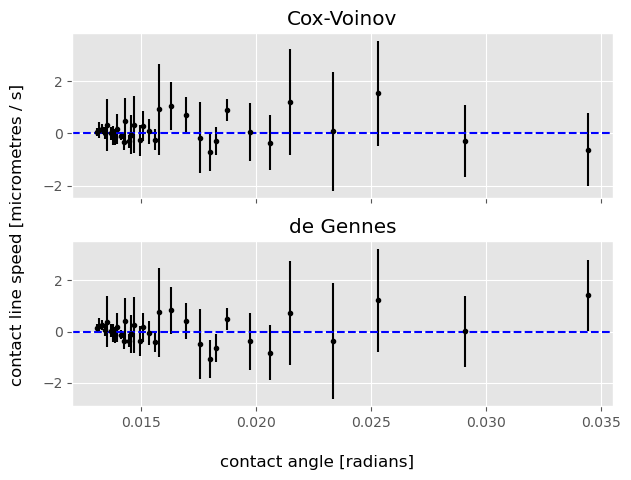

In [14]:
# calculating the residuals
residual_cv = speeds_mean - cox_voinov_speeds
residual_dg = speeds_mean - de_gennes_speeds

# plotting the residuals
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.errorbar(contact_angle_means, residual_cv, yerr=speeds_std, fmt="k.")
ax1.set_title("Cox-Voinov")
ax1.axhline(linestyle="--", color="b")

ax2.errorbar(contact_angle_means, residual_dg, yerr=speeds_std, fmt="k.")
ax2.set_title("de Gennes")
ax2.axhline(linestyle="--", color="b")

fig.supxlabel("contact angle [radians]")
fig.supylabel("contact line speed [micrometres / s]")

plt.tight_layout()
plt.show()

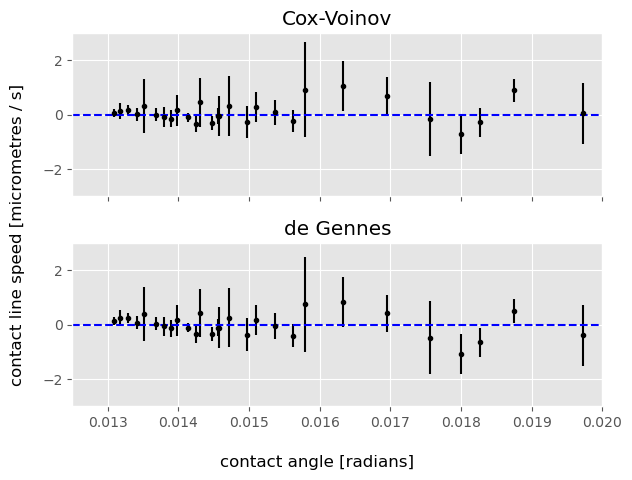

In [15]:
# plotting the residual graphs with limits on the x and y axis to focus on the main chuck of data points 
# of points near the smaller contact angles
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.errorbar(contact_angle_means, residual_cv, yerr=speeds_std, fmt="k.")
ax1.set_title("Cox-Voinov")
ax1.axhline(linestyle="--", color="b")
ax1.set_xlim([0.0125, 0.02])
ax1.set_ylim([-3, 3])

ax2.errorbar(contact_angle_means, residual_dg, yerr=speeds_std, fmt="k.")
ax2.set_title("de Gennes")
ax2.axhline(linestyle="--", color="b")
ax2.set_xlim([0.0125, 0.02])
ax2.set_ylim([-3, 3])

fig.supxlabel("contact angle [radians]")
fig.supylabel("contact line speed [micrometres / s]")

plt.tight_layout()
plt.show()

## The spreading law is de Gennes

The results of the chi-squared analysis suggests that de Gennes law is a better fit for the behaviour of the spreading drop because the reduced $χ^{2}$ value for de Gennes law is more probable. By looking at a $χ^{2}$ table for 32 degrees of freedom we see that for a value of $χ^{2}$ ≈ 15 (Cox-Voinox), there is around a 0.5% chance of obtaining a  $χ^{2}$ of 15 or higher,  if we repeat the experiment again. For a $χ^{2}$ ≈ 18 (de Gennes) there is a 2.5% chance of obtaining 18 or higher.

The values are quite close together, and both are rather small. We can also see from the residual graphs that there is only minor differences between the two laws. However since the de Gennes $χ^{2}$ value has a higher probability of occuring if we were to repeat the experiment multiple times, we come to the conclusion that the de Gennes Law fits the data better.

## Stretch yourself section

### Using Error Propagation

The past analysis was done by averaging the calculated values and finding the standard deviations between the mean values to give us the error. We can try to calculate the errors by propagation and see if this changes the results. 

In [16]:
# propagating the error in the speed values
def speed_errors(speeds, radius_diff, radius_errors):
    speed_errors = []
    
    for i in range(np.size(radius_errors)):
        if i + 1 != 35:
            speed_error = ((speeds[i] / radius_diff[i]) ** 2) * (radius_errors[i] ** 2 + radius_errors[i + 1] ** 2)
            speed_errors.append(sqrt(speed_error))
        
    return np.array(speed_errors)


speed_errors1_prop = speed_errors(speeds1, radius_diff1, radius_std)
speed_errors2_prop = speed_errors(speeds2, radius_diff2, radius_std)
speed_errors3_prop = speed_errors(speeds3, radius_diff3, radius_std)

speed_error_mean_prop = ((speeds_mean / (speeds1 + speeds2 + speeds3)) ** 2) * (speed_errors1_prop ** 2 + speed_errors2_prop ** 2 + speed_errors3_prop ** 2)

In [17]:
# propagating the error in the height values from Cardano's formula
def heights_errors(radius, radius_errors):
    heights_errors = 2 ** (-2 / 3) * radius ** 5 * radius_errors * (np.sqrt(radius ** 6 / 3 + ((-6 * V) / np.pi))) ** (-5 / 3)
    return heights_errors

heights1_errors = heights_errors(radius_data1_new, np.delete(radius_std, 0))
heights2_errors = heights_errors(radius_data2_new, np.delete(radius_std, 0))
heights3_errors = heights_errors(radius_data3_new, np.delete(radius_std, 0))
heights_all_errors = np.array([heights1_errors, heights2_errors, heights3_errors])

heights_means = np.mean(heights_all, axis=0)
heights_means_errors = np.sum(heights_all_errors, axis=0) / sqrt(3)

In [18]:
# propagating the errors in the angle calculations
def angle_errors(angles, radius, radius_error, heights, heights_error):
    radius_error = np.delete(radius_error, 0) # remove 1st element of this array as it contains a radius value that was never used to calculate an angle
    angle_errors = (2 / (radius ** 2 + heights ** 2)) * np.sqrt((heights * radius_error) ** 2 + (radius * heights_error) ** 2)
    return angle_errors


contact_angle_means_errors = np.sum(contact_angles_std, axis=0) / sqrt(3)

#### Repeat of the same code as before

In [19]:
# using curve_fit() to find the parameters and their uncertainties.
popt_cv, pcov_cv = curve_fit(cox_voinov, contact_angle_means, speeds_mean, sigma=speed_error_mean_prop, p0=[0.8, 0.005])
u_0_cv, theta_0_cv = popt_cv

popt_dg, pcov_dg = curve_fit(de_gennes, contact_angle_means, speeds_mean, sigma=speed_error_mean_prop, p0=[0.8, 0.005])
u_0_dg, theta_0_dg = popt_dg

# checking the parameters
print("---- Best-fit Parameters ----")
print(f"Cox-Voinov: u_0 = ({u_0_cv} \u00B1 {sqrt(pcov_cv[0][0])}) ms^-1, (theta_0 = {theta_0_cv} \u00B1 {sqrt(pcov_cv[1][1])}) rads")
print(f"de Gennes: u_0 = ({u_0_dg} \u00B1 {sqrt(pcov_dg[0][0])}) ms^-1, (theta_0 = {theta_0_dg} \u00B1 {sqrt(pcov_dg[1][1])}) rads")

---- Best-fit Parameters ----
Cox-Voinov: u_0 = (346469.36805706704 ± 20008.634222211036) ms^-1, (theta_0 = 0.010711298406552891 ± 0.0005461126558122455) rads
de Gennes: u_0 = (11771.590318034061 ± 635.3375259361783) ms^-1, (theta_0 = -0.012585438489964804 ± 0.00020610251384969793) rads


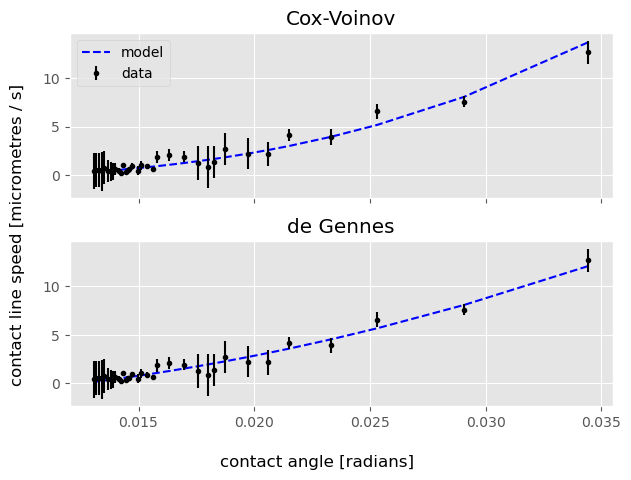

In [20]:
# computing model's predictions 
cox_voinov_speeds = cox_voinov(contact_angle_means, u_0_cv, theta_0_cv)
de_gennes_speeds = de_gennes(contact_angle_means, u_0_dg, theta_0_dg)

# plotting the models against the data
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(contact_angle_means, cox_voinov_speeds, "b--", label="model")
ax1.errorbar(contact_angle_means, speeds_mean, yerr=speed_error_mean_prop, fmt="k.", label="data")
ax1.set_title("Cox-Voinov")
ax1.legend()

ax2.plot(contact_angle_means, de_gennes_speeds, "b--")
ax2.errorbar(contact_angle_means, speeds_mean, yerr=speed_error_mean_prop, fmt="k.")
ax2.set_title("de Gennes")

fig.supxlabel("contact angle [radians]")
fig.supylabel("contact line speed [micrometres / s]")

plt.tight_layout()
plt.show()

In [21]:
# chi squared values
chi_squared_cv = calc_chi_squared(cox_voinov_speeds, speeds_mean, speed_error_mean_prop)
chi_squared_dg = calc_chi_squared(de_gennes_speeds, speeds_mean, speed_error_mean_prop)

# reduced chi squared values
degrees_of_freedom = len(speeds_mean) - 2
reduced_chi_squared_cv = chi_squared_cv / degrees_of_freedom
reduced_chi_squared_dg = chi_squared_dg / degrees_of_freedom

print(f"The reduced chi squared of the Cox-Voinox is {reduced_chi_squared_cv:.3f} and for de Gennes it is {reduced_chi_squared_dg:.3f} .")

The reduced chi squared of the Cox-Voinox is 1.177 and for de Gennes it is 1.041 .


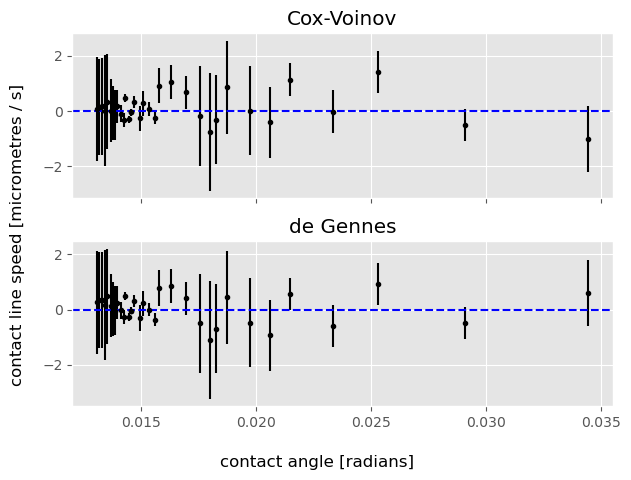

In [22]:
# calculating the residuals
residual_cv = speeds_mean - cox_voinov_speeds
residual_dg = speeds_mean - de_gennes_speeds

# plotting the residuals
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.errorbar(contact_angle_means, residual_cv, yerr=speed_error_mean_prop, fmt="k.")
ax1.set_title("Cox-Voinov")
ax1.axhline(linestyle="--", color="b")

ax2.errorbar(contact_angle_means, residual_dg, yerr=speed_error_mean_prop, fmt="k.")
ax2.set_title("de Gennes")
ax2.axhline(linestyle="--", color="b")

fig.supxlabel("contact angle [radians]")
fig.supylabel("contact line speed [micrometres / s]")

plt.tight_layout()
plt.show()

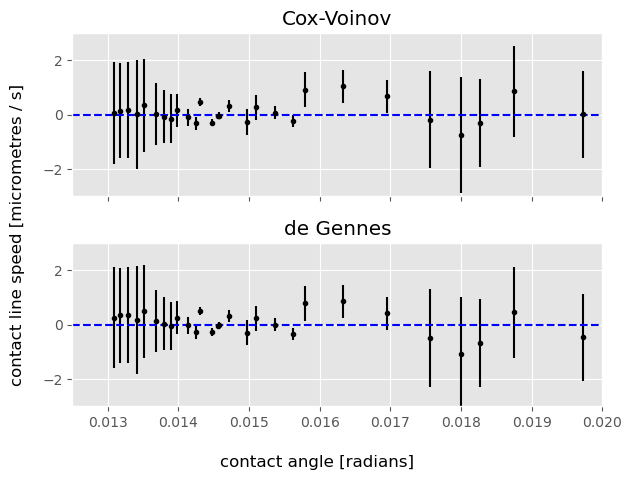

In [23]:
# plotting the residual graphs with limits on the x and y axis to focus on the main chuck of data points 
# of points near the smaller contact angles
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.errorbar(contact_angle_means, residual_cv, yerr=speed_error_mean_prop, fmt="k.")
ax1.set_title("Cox-Voinov")
ax1.axhline(linestyle="--", color="b")
ax1.set_xlim([0.0125, 0.02])
ax1.set_ylim([-3, 3])

ax2.errorbar(contact_angle_means, residual_dg, yerr=speed_error_mean_prop, fmt="k.")
ax2.set_title("de Gennes")
ax2.axhline(linestyle="--", color="b")
ax2.set_xlim([0.0125, 0.02])
ax2.set_ylim([-3, 3])

fig.supxlabel("contact angle [radians]")
fig.supylabel("contact line speed [micrometres / s]")

plt.tight_layout()
plt.show()

#### Conclusion from Error Propagation

Through propagating the errors instead of finding the standard deviation, we get much better results for the reduced $χ^{2}$ values. The reduced $χ^{2}$ of the Cox-Voinox law was 1.177 and for the de Gennes law it was 1.041, which is closer to a value of one. As expected the de Gennes Law is still the better spreading law for this set of data. The reduced $χ^{2}$ values of both the laws are much closer to 1 than the original method. This may indicate that propagating the errors gives much more reasonable estimations for the uncertainties that were calculated. 

### Interpolating the Data

The dataset used has many values on the lower end and fairly fewer values with larger radii. By interpolating we can see how much of an effect recording larger values of radii would effect the results we found.

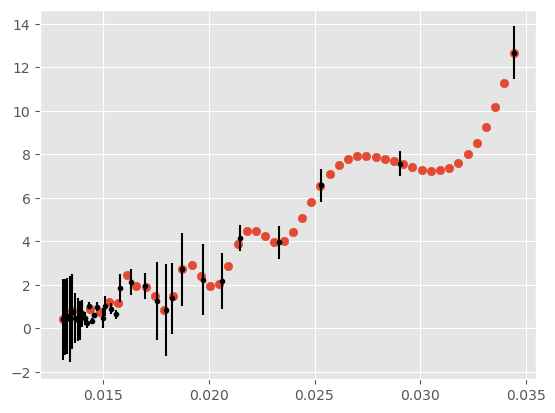

In [24]:
from scipy.interpolate import interp1d

speeds_f = interp1d(contact_angle_means, speeds_mean, "cubic")

contact_angles_interp = np.linspace(min(contact_angle_means),max(contact_angle_means),50)
speeds_interp = speeds_f(contact_angles_interp)

plt.scatter(contact_angles_interp, speeds_interp)
plt.errorbar(contact_angle_means, speeds_mean, yerr=speed_error_mean_prop, fmt="k.")
plt.show()